In [270]:
from keras.applications  import vgg16
from keras_preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input 


In [271]:
import os
imgFiles=[]
folder="C:/Users/Dell/Desktop/DS/simi/images"
for f in os.listdir(folder):
    imgFiles.append("images/"+f)

In [272]:
imgFiles[0]

'images/0_0_001.png'

In [273]:
import matplotlib.pyplot as plt

images=[]
for img in imgFiles:
    img=load_img(img,target_size=(224,224))
    
   
    images.append(img)


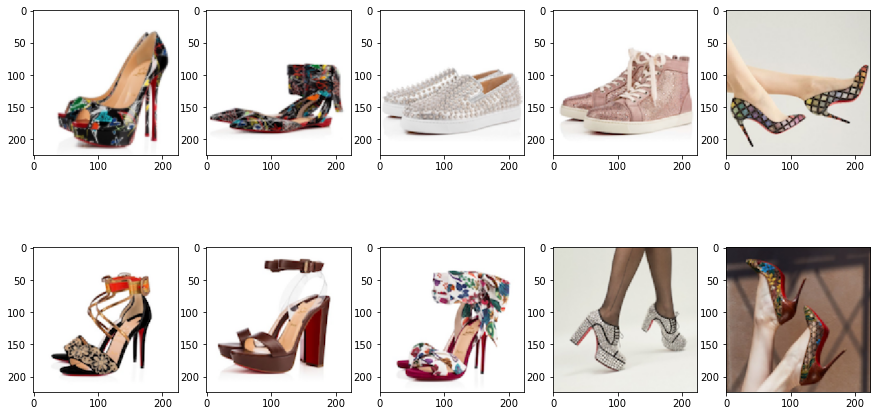

In [274]:

k=1
plt.figure(figsize=(15,8))
for i in range(0,10):
    plt.subplot(2,5,k)
    plt.imshow(images[i])
    k=k+1


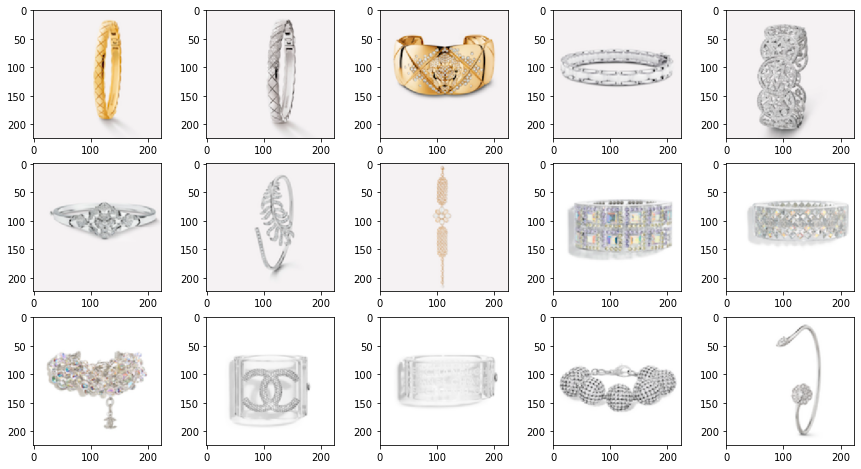

In [275]:

k=1
plt.figure(figsize=(15,8))
for i in range(500,515):
    plt.subplot(3,5,k)
    plt.imshow(images[i])
    k=k+1


In [276]:
data=pd.read_csv("style.csv")
data.head()

,brand_name,brand_label,product_name,product_label,file
0,Christian Louboutin,0,shoes,0,0_0_001.png
1,Christian Louboutin,0,shoes,0,0_0_002.png
2,Christian Louboutin,0,shoes,0,0_0_003.png
3,Christian Louboutin,0,shoes,0,0_0_004.png
4,Christian Louboutin,0,shoes,0,0_0_005.png


<AxesSubplot:xlabel='brand_label', ylabel='count'>

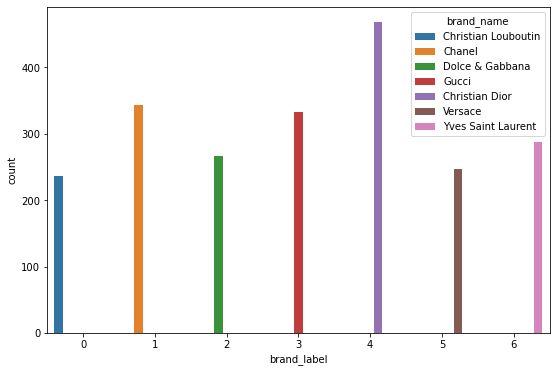

In [277]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.countplot(x="brand_label",hue="brand_name",data=data)


<AxesSubplot:xlabel='product_label', ylabel='count'>

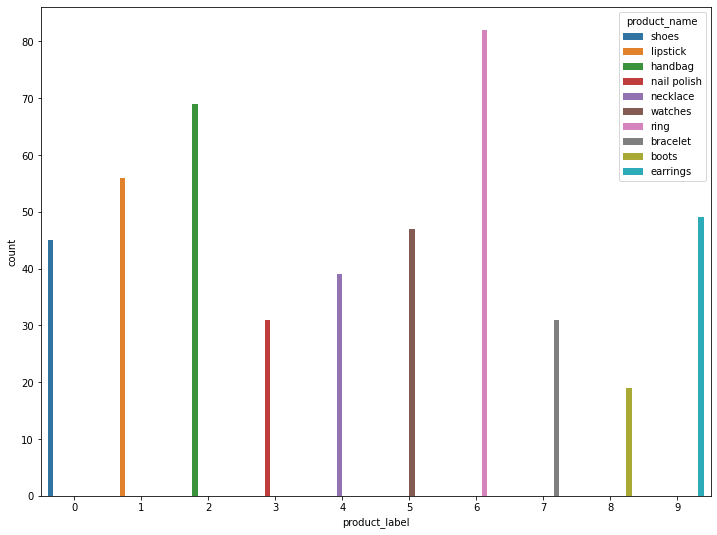

In [278]:
plt.figure(figsize=(12,9))
df=data[data["brand_name"]=="Christian Dior"]
sns.countplot(x="product_label",hue="product_name",data=df)

In [279]:
import numpy as np



def imgPreprocessig(img):
    arr_img=img_to_array(img)
    img_batch=np.expand_dims(arr_img,axis=0)
    
    # print(img_batch.shape)
    return img_batch

In [280]:
processed_img=[]
for img in images:
    processed_img.append(imgPreprocessig(img))




In [281]:
processed_img=np.vstack(processed_img)
processed_img=preprocess_input(processed_img)

In [282]:
from keras.applications import vgg16

model=vgg16.VGG16(weights='imagenet')
feat_extr=Model(inputs= model.input, outputs=model.get_layer("fc2").output)
feat_extr.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [283]:
imgFeat=feat_extr.predict(processed_img)

69/69 [==============================] - 358s 5s/step


In [284]:
from sklearn.metrics.pairwise import cosine_similarity
cosSimi_df=cosine_similarity(imgFeat)

In [285]:
cosSimi_df

array([[0.99999976, 0.55404717, 0.5586058 , ..., 0.26331756, 0.36241317,
        0.29515976],
       [0.55404717, 1.0000001 , 0.35209468, ..., 0.30971038, 0.33493724,
        0.2714623 ],
       [0.5586058 , 0.35209468, 0.9999998 , ..., 0.3299568 , 0.37922633,
        0.2766167 ],
       ...,
       [0.26331756, 0.30971038, 0.3299568 , ..., 1.0000002 , 0.3185685 ,
        0.31234545],
       [0.36241317, 0.33493724, 0.37922633, ..., 0.3185685 , 0.99999994,
        0.49708712],
       [0.29515976, 0.2714623 , 0.2766167 , ..., 0.31234545, 0.49708712,
        1.0000002 ]], dtype=float32)

In [286]:
import pandas as pd
df=pd.DataFrame(cosSimi_df,columns=[imgFiles],index=[imgFiles])
df.head()

,images/0_0_001.png,images/0_0_002.png,images/0_0_003.png,images/0_0_004.png,images/0_0_005.png,images/0_0_006.png,images/0_0_007.png,images/0_0_008.png,images/0_0_009.png,images/0_0_010.png,...,images/6_9_012.png,images/6_9_013.png,images/6_9_014.png,images/6_9_015.png,images/6_9_016.png,images/6_9_017.png,images/6_9_018.png,images/6_9_019.png,images/6_9_020.png,images/6_9_021.png
images/0_0_001.png,1.000000,0.554047,0.558606,0.569193,0.521644,0.592031,0.503121,0.587526,0.352372,0.402142,...,0.301020,0.259099,0.247524,0.354853,0.276685,0.399439,0.215223,0.263318,0.362413,0.295160
images/0_0_002.png,0.554047,1.000000,0.352095,0.421485,0.522096,0.451593,0.321059,0.683562,0.364141,0.295505,...,0.285047,0.265274,0.204258,0.326139,0.348535,0.518782,0.210399,0.309710,0.334937,0.271462
images/0_0_003.png,0.558606,0.352095,1.000000,0.818573,0.382171,0.444806,0.624093,0.450202,0.348380,0.279828,...,0.403518,0.339660,0.243398,0.399831,0.352441,0.292396,0.251002,0.329957,0.379226,0.276617
images/0_0_004.png,0.569193,0.421485,0.818573,1.000000,0.416590,0.525976,0.636036,0.499584,0.374038,0.305759,...,0.345944,0.351291,0.293232,0.341896,0.342100,0.295175,0.220416,0.323877,0.377279,0.299922
images/0_0_005.png,0.521644,0.522096,0.382171,0.416590,1.000000,0.473509,0.325196,0.599150,0.506764,0.393804,...,0.254234,0.241989,0.264299,0.371280,0.313445,0.401367,0.157718,0.258876,0.314481,0.281415


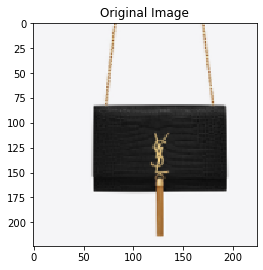

****************************************************************************************************
Top  10  Recommendations are:


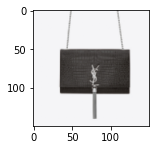

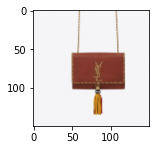

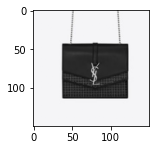

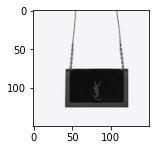

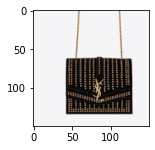

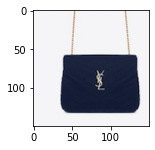

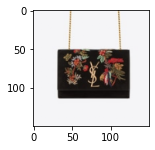

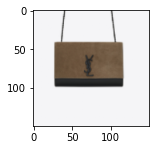

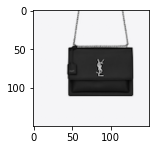

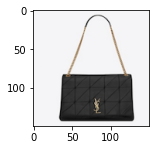

In [269]:
plt.figure(figsize=(4,9))
plt.title("Original Image")

plt.imshow(images[2000])
plt.show()

print("*"*100)

num=10
print("Top ",num," Recommendations are:")

file=df[imgFiles[2000]]
recommendations=file.sort_values(by=file.columns[0],ascending=False)[1:num+1].index

k=1

for i in recommendations:
    # print(i[0])
    plt.figure(figsize=(12,10))
    plt.subplot(2,5,k)
    
    img=plt.imread(i[0])
    arr_img=img_to_array(img)
    plt.imshow(arr_img)
    plt.show()